# Protocolo "Travelling Ballot"

O modelo “Travelling Ballot” para votação quântica tem como característica a utilização de uma única cédula de votação quântica que viaja de eleitor para eleitor. Nesse protocolo, cada eleitor realiza uma operação quântica na cédula para o registro do seu voto.

Durante a sua preparação, uma autoridade eleitoral cria uma cédula, que representa o estado quântico inicial, e envia ao primeiro eleitor. Os eleitores recebem a célula dentro de uma fila e executam uma operação unitária quântica que representa o seu voto, e distribuem a cédula entre si dentro dessa fila. Após o último eleitor finalizar o seu voto, a cédula retorna à autoridade, que mede o estado final para obter o resultado total da eleição.

A principal vantagem desse protocolo é que a cédula contém apenas a informação agregada de todos os votos, e não apenas a escolha de cada indivíduo, o que elimina a etapa de contagem durante o processo eleitoral. Além disso, a privacidade é mantida porque é impossível reverter a operação para descobrir o voto de uma pessoa específica.

Entretanto, a abordagem se torna vulnerável a ataques de colisão entre eleitores, porque a distribuição de uma única cédula de votação entre todos os eleitores poderia, em teoria, ser um fator facilitador para que os eleitores pudessem descobrir o voto de outros.


In [1]:
!pip install qiskit
!pip install qiskit-aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 30.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 41.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 100.2 MB/s eta 0:00:00


In [2]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
import numpy as np
import random

In [3]:
# Definição do cenário
ELEITORES = 10
VOTOS_SIM = 8
VOTOS_NAO = ELEITORES - VOTOS_SIM
THETA = np.pi / (2 * ELEITORES)
votos = [1] * VOTOS_SIM + [0] * VOTOS_NAO

print(f"--- Configuração da Eleição ---")
print(f"Total de Eleitores (N): {ELEITORES}")
print(f"Votos 'Sim' reais (k): {VOTOS_SIM}")
print(f"Lista de votos: {votos}")
print(f"Ângulo (theta) por voto: {THETA:.4f} radianos")

--- Configuração da Eleição ---
Total de Eleitores (N): 10
Votos 'Sim' reais (k): 8
Lista de votos: [1, 1, 1, 1, 1, 1, 1, 1, 0, 0]
Ângulo (theta) por voto: 0.1571 radianos


In [4]:
# Circuito quântico

tb = QuantumCircuit(1, 1)

for voto in votos:
  if voto == 1:
    tb.ry(THETA, 0)
  else:
    tb.id(0)

tb.barrier()
tb.measure(0,0)

print(tb.draw())

     ┌──────────┐┌──────────┐┌──────────┐┌──────────┐┌──────────┐┌──────────┐»
  q: ┤ Ry(π/20) ├┤ Ry(π/20) ├┤ Ry(π/20) ├┤ Ry(π/20) ├┤ Ry(π/20) ├┤ Ry(π/20) ├»
     └──────────┘└──────────┘└──────────┘└──────────┘└──────────┘└──────────┘»
c: 1/════════════════════════════════════════════════════════════════════════»
                                                                             »
«     ┌──────────┐┌──────────┐┌───┐┌───┐ ░ ┌─┐
«  q: ┤ Ry(π/20) ├┤ Ry(π/20) ├┤ I ├┤ I ├─░─┤M├
«     └──────────┘└──────────┘└───┘└───┘ ░ └╥┘
«c: 1/══════════════════════════════════════╩═
«                                           0 


Contagens de '0' e '1': {'1': 183, '0': 317}


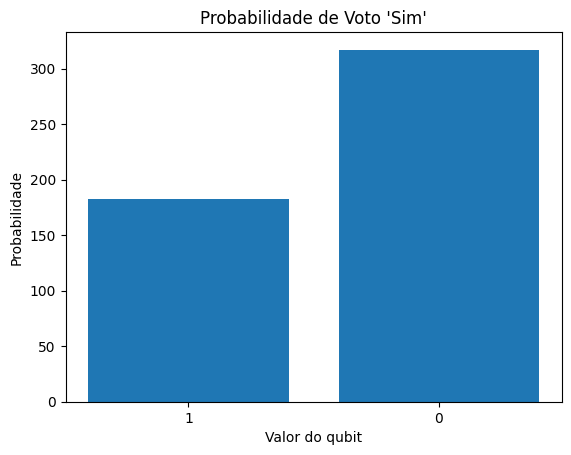

In [5]:
# Simulação

sim = AerSimulator()
job = sim.run(tb, shots=500)
result = job.result()
counts = result.get_counts()

print("Contagens de '0' e '1':", counts)
plot_histogram(counts)

plt.title("Probabilidade de Voto 'Sim'")
plt.xlabel("Valor do qubit")
plt.ylabel("Probabilidade")
plt.bar(counts.keys(), counts.values())
plt.show()

In [6]:
# Avaliando a precisão do protocolo

p_1 = counts.get('1', 0) / sum(counts.values())

print(f"\nProbabilidade de '1' (P(1)) medida: {p_1:.6f}")

sqrt_p_1 = np.sqrt(p_1)
if sqrt_p_1 > 1.0: sqrt_p_1 = 1.0

votos_sim_estimados = (2 / THETA) * np.arcsin(sqrt_p_1)

print("\n--- Apuração Final ---")
print(f"Número de votos 'Sim' (k) estimado: {votos_sim_estimados:.4f}")
print(f"Número de votos 'Sim' (k) real:    {VOTOS_SIM}")
print(f"Resultado (arredondado): {np.round(votos_sim_estimados)}")


Probabilidade de '1' (P(1)) medida: 0.366000

--- Apuração Final ---
Número de votos 'Sim' (k) estimado: 8.2727
Número de votos 'Sim' (k) real:    8
Resultado (arredondado): 8.0
